# 오토인코더 : 정답 없이 모델을 학습시키는 비지도 학습 모델

In [3]:
from IPython import display

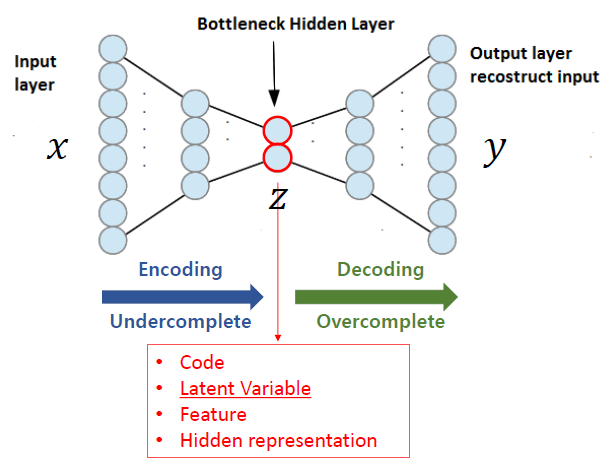

In [5]:
display.Image("C:/Users/choij/Desktop/datasets/autoencoder.png")

## 차원축소를 목적으로 주로 사용된다

## 압축된 것은 주로 latent variable로 불리며 내용 손실 없이 압축했는지가 중요하다

## 오토인코더 파이토치로 구현해보기

### 출처 : 딥러닝을 위한 파이토치 입문-오토인코더

In [13]:
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [11]:
dataset = torchvision.datasets.MNIST(root = './data', download = True, train = True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 50, shuffle = True)

In [58]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128), #minist 이미지는 1 x 28 x 28이다
            nn.ReLU(),
            nn.Linear(128, 32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.ReLU()) # 길이가 10인 벡터를 반환한다.
        
        self.decoder = nn.Sequential(
            nn.Linear(10, 32),
            nn.ReLU(),
            nn.Linear(32, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid())
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

## 목적은 입력이미지와 유사한 출력 이미지를 얻는 것

## 입력이미지와 출력이미지의 차이는 MSE 손실함수를 사용하고 최적화 함수는 Adam 을 사용한다

### VAE 에서는 MSE 와 CSE 둘 다 사용한다.

In [20]:
model = AutoEncoder()

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-4)

In [27]:
epochs = 50
for epoch in range(epochs):
    running_loss = 0
    
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs.view(-1, 28 * 28))
        outputs = outputs.view(-1, 1, 28, 28)
        loss = criterion(inputs, outputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(trainloader)
    print(f'cost : {cost:.3f}, epoch : {epoch}')

cost : 0.085, epoch : 0
cost : 0.058, epoch : 1
cost : 0.049, epoch : 2
cost : 0.042, epoch : 3
cost : 0.038, epoch : 4
cost : 0.036, epoch : 5
cost : 0.035, epoch : 6
cost : 0.034, epoch : 7
cost : 0.033, epoch : 8
cost : 0.032, epoch : 9
cost : 0.032, epoch : 10
cost : 0.031, epoch : 11
cost : 0.031, epoch : 12
cost : 0.030, epoch : 13
cost : 0.030, epoch : 14
cost : 0.029, epoch : 15
cost : 0.029, epoch : 16
cost : 0.029, epoch : 17
cost : 0.028, epoch : 18
cost : 0.028, epoch : 19
cost : 0.028, epoch : 20
cost : 0.028, epoch : 21
cost : 0.027, epoch : 22
cost : 0.027, epoch : 23
cost : 0.027, epoch : 24
cost : 0.027, epoch : 25
cost : 0.027, epoch : 26
cost : 0.027, epoch : 27
cost : 0.027, epoch : 28
cost : 0.026, epoch : 29
cost : 0.026, epoch : 30
cost : 0.026, epoch : 31
cost : 0.026, epoch : 32
cost : 0.026, epoch : 33
cost : 0.026, epoch : 34
cost : 0.026, epoch : 35
cost : 0.026, epoch : 36
cost : 0.026, epoch : 37
cost : 0.026, epoch : 38
cost : 0.025, epoch : 39
cost : 0.0

In [40]:
outputs = outputs.transpose(2,3,1,0)

## 생성 이미지

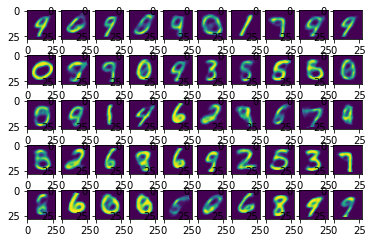

In [49]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(outputs[:,:,:,i])

### 오토인코더는 합성곱층이 아닌 일렬 노드인 nn.Linear 이기 때문에 이미지를 일자로 펴서 넣어준다

# 디노이징 오토인코더

## 오토인코더의 기본적인 목적은 새로운 데이터를 만드는 것인데 출력데이터와 입력데이터가 같다면 이는 의미가 무색하다

## 따라서 입력값에 과적합 되지 않도록 입력값에 노이즈를 주입하거나 신경마에 드롭아웃을 적용한다

## 출력데이터와 노이즈가 없는 원래 입력 데이터를 가지고 손실함수를 계산한다.

## 따라서 노이즈가 있는 이미지를 가지고 노이즈가 없는 이미지와 유사한 데이터를 만드는 구조이다.

In [52]:
dataset = torchvision.datasets.MNIST(root = './data', download = True, train = True, transform = transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(dataset, batch_size = 50, shuffle = True)

In [54]:
inputs.size()

torch.Size([50, 1, 28, 28])

In [61]:
for epoch in range(10):
    running_loss = 0
    
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        noise = torch.normal(0, 0.5, size = inputs.size())
        dirty_inputs = inputs + noise
        
        outputs = model(dirty_inputs.view(-1, 28 * 28))
        outputs = outputs.view(-1,1,28,28)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    cost = running_loss / len(trainloader)
    
    print(f'cost : {cost :3f}, epoch : {epoch}')

cost : 0.030392, epoch : 0
cost : 0.030046, epoch : 1
cost : 0.029782, epoch : 2
cost : 0.029580, epoch : 3
cost : 0.029433, epoch : 4
cost : 0.029288, epoch : 5
cost : 0.029145, epoch : 6
cost : 0.029032, epoch : 7
cost : 0.028938, epoch : 8
cost : 0.028830, epoch : 9


In [64]:
outputs = outputs.detach().numpy()
outputs = outputs.transpose(2,3,1,0)

### 생성 이미지

### 기존의 오토인코더와는 크게 차이는 느끼지 못했다.

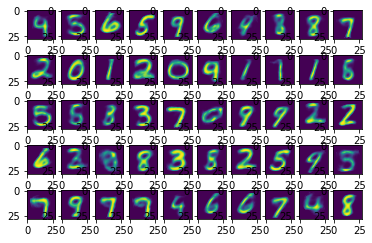

In [65]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(outputs[:,:,:,i])

# 합성곱 오토인코더

## 기존의 오토인코더가 일렬 노드를 썼다면 이번에는 합성공층을 사용한다

## 이미지가 일자로 펴지지 않고 그대로 들어와 연산이 진행된다.

## 인코더를 거친 벡터는 일렬로 펴진 상태로 추출되고 다시 은닉층을 거친뒤  사각형으로 변환 후 디코더에 넣는다.

In [67]:
class Flatten(nn.Module):
    def forward(self, x):
        batch_size = x.shape[0]
        return x.view(batch_size, -1)

## 인코더를 거친 맵의 크기는 (배치사이즈, 채널, 너비, 높이) 이다.

## 따라서 배치사이즈가 이미지의 개수이므로 벡터가 배치사이즈만큼 존재해야한다.

In [70]:
class Deflatten(nn.Module):
    def __init__(self, k):
        super(Deflatten, self).__init__()
        self.k = k
        
    def forward(self, x):
        s = x.size()
        feature_size = int((s[1] // self.k) ** 0.5)
        return x.view(s[0], self.k, feature_size, feature_size)

## latent variable 의 크기는 채널수 x 너비 x 높이 이다.그러므로 이미지 한변의 길이는 벡터사이즈 // 채널 수) ^ 0.5 이다

In [74]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        k = 16
        self.encoder = nn.Sequential(
            nn.Conv2d(1, k, 3, stride = 2), nn.ReLU(),
            nn.Conv2d(k, 2 * k, 3, stride = 2), nn.ReLU(),
            nn.Conv2d(2 * k, 4 * k, 3, stride = 1), nn.ReLU(),
            Flatten(),
            nn.Linear(1024, 10),  # output size : {(input_size - kernel_size + 2 * padding) / stride} + 1 
            nn.ReLU())
        
        self.decoder = nn.Sequential(
            nn.Linear(10, 1024), nn.ReLU(),
            Deflatten(4 * k),
            nn.ConvTranspose2d(4 * k, 2 * k, 3, stride = 1), nn.ReLU(),
            nn.ConvTranspose2d(2 * k, k, 3, stride = 2), nn.ReLU(),
            nn.ConvTranspose2d(k, 1, 3, stride = 2, output_padding = 1), nn.Sigmoid()) #크기를 맞춰주기 위해 패딩을 씌워줬다.
    
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        
        return decoded

## ConvTranspose : 쉽게 말해서 Conv2d 의 반대로 Deconvolution이라고 말할 수 있으며 이미지 크기를 늘리는 것이다.

In [76]:
model = AutoEncoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 1e-3)

In [77]:
for epoch in range(10):
    running_loss = 0
    for data in trainloader:
        inputs, _ = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    cost = running_loss / len(trainloader)
    
    print(f'cost : {cost :3f}, epoch : {epoch}')

cost : 0.082118, epoch : 0
cost : 0.039685, epoch : 1
cost : 0.032810, epoch : 2
cost : 0.030124, epoch : 3
cost : 0.028714, epoch : 4
cost : 0.027842, epoch : 5
cost : 0.027244, epoch : 6
cost : 0.026822, epoch : 7
cost : 0.026470, epoch : 8
cost : 0.026159, epoch : 9


In [78]:
outputs = outputs.detach().numpy()
outputs = outputs.transpose(2,3,1,0)

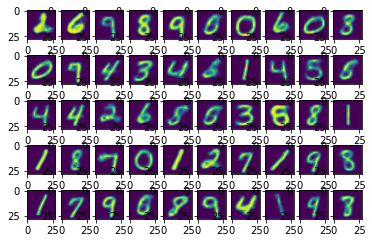

In [79]:
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(outputs[:,:,:,i])